In [16]:
# Importar las librerias necesarias para hacer un EDA   
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_imss = pd.read_csv('../tidy/tidy_imss.csv')
df_agp = pd.read_csv('../tidy/tidy_agricultura_ganaderia_pesca.csv')

In [18]:
#Los datos de producción estan dados por año, por lo que voy a homologar los datos del imss para tener la cantidad de regristos anuales.
df_imss["fecha"] = pd.to_datetime(df_imss["fecha"])
df_imss["ANO"] = df_imss["fecha"].dt.year
#Y le daré el mismo formato a la columna de año de la tabla de agp
df_agp["ANO"] = pd.to_datetime(df_agp["ANO"])
df_agp["ANO"] = df_agp["ANO"].dt.year

In [19]:
# Veamos la produccion
#Produccion anual por sector
produccion_total_anual = df_agp[['ANO','SECTOR','PRODTON']].groupby(['ANO','SECTOR'])['PRODTON'].sum()
produccion_total_anual = produccion_total_anual.unstack('SECTOR').drop(index = 2023, errors = 'ignore')
produccion_total_anual['TOTAL'] = produccion_total_anual[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
produccion_total_anual

SECTOR,Agricultura,Ganadería,Pesca,TOTAL
ANO,,,,
2006,4685124.21,555973.539,481505.00000,5.722603e+06
2007,4842636.26,551983.755,490754.00000,5.885374e+06
2008,5196275.24,555346.788,654957.00000,6.406579e+06
2009,4963296.84,562665.476,714565.00200,6.240527e+06
2010,5489600.86,556202.169,497641.00000,6.543444e+06
2011,5051580.94,567504.897,538763.00000,6.157849e+06
2012,5691756.43,569220.769,538644.00000,6.799621e+06
2013,5562560.85,588550.325,591013.00000,6.742124e+06
2014,5440900.21,561686.577,457990.00000,6.460577e+06


In [20]:
df_imss

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion,ANO
0,W2,6,0,2006,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2006
1,W2,6,0,2006,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2006
2,W2,3,0,2006,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2006
3,W2,6,0,2006,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 30 y menor a 35 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2006
4,W2,5,0,2006,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 35 y menor a 40 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576254,W9,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Hombre,Mayor o igual a 50 y menor a 55 años de edad,mayor a 8 y hasta 9 veces el salario mínimo,2022
1576255,W4,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 25 y menor a 30 años de edad,mayor a 3 y hasta 4 veces el salario mínimo,2022
1576256,W3,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 30 y menor a 35 años de edad,mayor a 2 y hasta 3 veces el salario mínimo,2022
1576257,W2,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 35 y menor a 40 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2022


Busco sesgo por rango salarial

In [21]:
#Registros anuales por rango de edad
imss_registros_anual = df_imss[['ANO', 'rango_salarial']].groupby(['ANO','rango_salarial'])['rango_salarial'].count()
imss_registros_anual = imss_registros_anual.unstack('rango_salarial')
imss_registros_anual

rango_salarial,W1,W10,W11,W12,W13,W14,W15,W16,W17,W18,...,W23,W24,W25,W3,W4,W5,W6,W7,W8,W9
ANO,,,,,,,,,,,,,,,,,,,,,
2006,666.0,1033.0,906.0,764.0,538.0,512.0,412.0,371.0,235.0,203.0,...,91.0,103.0,606.0,13499.0,8106.0,5097.0,3702.0,2703.0,1966.0,1459.0
2007,304.0,1169.0,1017.0,691.0,626.0,557.0,405.0,362.0,182.0,276.0,...,95.0,112.0,697.0,13398.0,8300.0,5392.0,3938.0,2888.0,2248.0,1385.0
2008,272.0,1217.0,937.0,715.0,617.0,572.0,427.0,328.0,300.0,164.0,...,70.0,121.0,754.0,12016.0,7720.0,5074.0,3636.0,2881.0,2194.0,1337.0
2009,301.0,1383.0,978.0,827.0,693.0,536.0,508.0,424.0,260.0,257.0,...,153.0,217.0,751.0,14072.0,8427.0,5707.0,4124.0,3055.0,2374.0,1555.0
2010,332.0,1289.0,1004.0,787.0,676.0,457.0,426.0,351.0,305.0,262.0,...,120.0,237.0,790.0,14070.0,8278.0,5811.0,4187.0,3228.0,2365.0,1946.0
2011,176.0,1407.0,1130.0,756.0,660.0,474.0,456.0,532.0,342.0,226.0,...,175.0,111.0,1036.0,14196.0,8742.0,6012.0,4519.0,3189.0,2529.0,1920.0
2012,287.0,1420.0,1158.0,895.0,594.0,551.0,521.0,434.0,314.0,285.0,...,126.0,315.0,979.0,13767.0,8906.0,6282.0,4457.0,3400.0,2506.0,2116.0
2013,282.0,1521.0,1224.0,932.0,637.0,628.0,478.0,413.0,364.0,346.0,...,177.0,191.0,1058.0,13578.0,9080.0,6355.0,4461.0,3577.0,2624.0,1949.0
2014,378.0,1591.0,1218.0,914.0,616.0,568.0,438.0,350.0,408.0,259.0,...,181.0,166.0,1059.0,14392.0,8812.0,6551.0,4685.0,3437.0,2819.0,2018.0


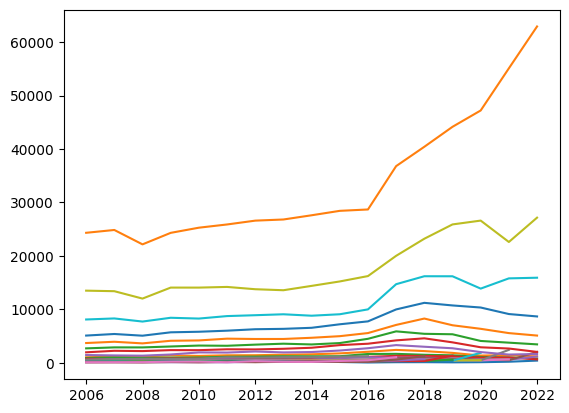

In [22]:
for columna in imss_registros_anual.columns:
    plt.plot(imss_registros_anual.index, imss_registros_anual[columna], label=columna)

In [23]:
#Que signigica que para un rango haya un total de NaN asegurados registrados con ese salario en un año?
condicion_1 = df_imss['rango_salarial']=='W17'
condicion_2 = df_imss['ANO']==2022
df_imss.loc[condicion_1 & condicion_2]

#Significa que no hay salarios en ese año de ese rango.

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion,ANO


In [24]:
#La correlacion de la produccion total en cada rango de edad
rango_sal_corr = []

for rango in imss_registros_anual.columns:
    try:
        correlation = np.corrcoef(imss_registros_anual[rango], produccion_total_anual['TOTAL'])[0, 1]
        rango_sal_corr.append({
            'rango_salarial': rango,
            'correlation': correlation
        })
    except KeyError:
        pass

rango_sal_corr = pd.DataFrame(rango_sal_corr)

rango_sal_corr_top = rango_sal_corr.loc[rango_sal_corr['correlation'] > 0.60]
rango_sal_corr_top


,rango_salarial,correlation
2,W11,0.619663
3,W12,0.735165
23,W8,0.632052


In [25]:
#Registros anuales por sexo
imss_anual_sexo = df_imss[['ANO', 'sexo']].groupby(['ANO','sexo'])['sexo'].count()
imss_anual_sexo = imss_anual_sexo.unstack('sexo')
imss_anual_sexo

sexo,Hombre,Mujer
ANO,,
2006,49372,18956
2007,50189,19651
2008,46539,17920
2009,51382,20571
2010,51623,21487
2011,53100,22387
2012,53658,23231
2013,54102,23534
2014,54912,24598


In [36]:
imss_anual_sexo['Diferencia'] = imss_anual_sexo['Hombre'] - imss_anual_sexo['Mujer']
imss_anual_sexo

sexo,Hombre,Mujer,Diferencia
ANO,,,
2006,49372,18956,30416
2007,50189,19651,30538
2008,46539,17920,28619
2009,51382,20571,30811
2010,51623,21487,30136
2011,53100,22387,30713
2012,53658,23231,30427
2013,54102,23534,30568
2014,54912,24598,30314


In [37]:
#La correlacion de la produccion total en cada sexo
sexo_corr = []

for sexo in imss_anual_sexo.columns:
    try:
        correlation = np.corrcoef(imss_anual_sexo[sexo], produccion_total_anual['TOTAL'])[0, 1]
        sexo_corr.append({
            'sexo': sexo,
            'correlation': correlation
        })
    except KeyError:
        pass

sexo_corr = pd.DataFrame(sexo_corr)
sexo_corr

,sexo,correlation
0,Hombre,0.167693
1,Mujer,0.156122
2,Diferencia,0.181302


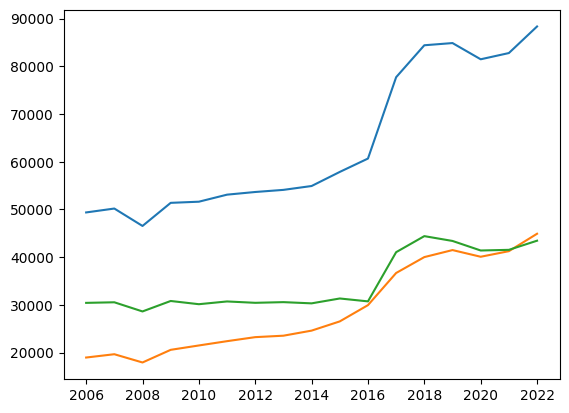

In [38]:
for sexo in imss_anual_sexo:
    plt.plot(imss_anual_sexo.index, imss_anual_sexo[sexo])

In [33]:
imss_edad_anual = df_imss[['ANO', 'rango_edad']].groupby(['ANO','rango_edad'])['rango_edad'].count()
imss_edad_anual = imss_edad_anual.unstack('rango_edad')
imss_edad_anual

rango_edad,75 o más años de edad,Mayor o igual a 15 y menor a 20 años de edad,Mayor o igual a 20 y menor a 25 años de edad,Mayor o igual a 25 y menor a 30 años de edad,Mayor o igual a 30 y menor a 35 años de edad,Mayor o igual a 35 y menor a 40 años de edad,Mayor o igual a 40 y menor a 45 años de edad,Mayor o igual a 45 y menor a 50 años de edad,Mayor o igual a 50 y menor a 55 años de edad,Mayor o igual a 55 y menor a 60 años de edad,Mayor o igual a 60 y menor a 65 años de edad,Mayor o igual a 65 y menor a 70 años de edad,Mayor o igual a 70 y menor a 75 años de edad,Menores de 15 años de edad
ANO,,,,,,,,,,,,,,
2006,869,1946,4474,7142,8969,8720,8318,7620,6551,5432,4115,2336,1568,268
2007,924,2063,4406,7206,8878,9247,8539,7872,6753,5758,4203,2244,1512,235
2008,931,1775,3980,6603,7906,8515,8002,7335,6429,5610,3782,2194,1253,144
2009,995,1895,4351,7208,8610,9578,8815,8259,7498,6448,4373,2419,1412,92
2010,1069,1729,4396,7078,8605,9594,8964,8712,7606,6752,4604,2482,1448,71
2011,1126,1718,4349,7238,9028,9671,9439,9024,7868,7233,4709,2598,1417,69
2012,1149,1713,4354,7070,8868,9655,9822,9258,8245,7618,4854,2848,1371,64
2013,1038,1668,4365,7179,8546,9647,9915,9226,8355,7858,5444,2774,1533,88
2014,1107,1800,4441,7279,8605,9844,10082,9218,8803,8042,5652,2928,1666,43


In [35]:
#La correlacion de la produccion total en cada rango de edad
rango_edad_corr = []

for rango in imss_edad_anual.columns:
    try:
        correlation = np.corrcoef(imss_edad_anual[rango], produccion_total_anual['TOTAL'])[0, 1]
        rango_edad_corr.append({
            'rango_edad': rango,
            'correlation': correlation
        })
    except KeyError:
        pass

rango_edad_corr = pd.DataFrame(rango_edad_corr)

rango_edad_corr_top = rango_edad_corr.loc[rango_edad_corr['correlation'] > 0]
rango_edad_corr_top

,rango_edad,correlation
0,75 o más años de edad,0.304551
1,Mayor o igual a 15 y menor a 20 años de edad,0.140988
2,Mayor o igual a 20 y menor a 25 años de edad,0.130918
3,Mayor o igual a 25 y menor a 30 años de edad,0.139226
4,Mayor o igual a 30 y menor a 35 años de edad,0.098091
5,Mayor o igual a 35 y menor a 40 años de edad,0.135703
6,Mayor o igual a 40 y menor a 45 años de edad,0.227330
7,Mayor o igual a 45 y menor a 50 años de edad,0.190112
8,Mayor o igual a 50 y menor a 55 años de edad,0.160644
9,Mayor o igual a 55 y menor a 60 años de edad,0.212696
